In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [5]:
df = pd.read_csv('/content/dataset.csv')
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [8]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df.fillna({'artists':'Unknown',
           'album_name':'Unknown',
           'track_name':'Unknown'},
           inplace=True)
df['mode'] = df['mode'].astype(bool)

In [10]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           114000 non-null  object 
 2   album_name        114000 non-null  object 
 3   track_name        114000 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  bool   
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [12]:
#deveria ser entre 3 e 7
df[df['time_signature'] < 3]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
117,65VhbQdqvozUntjnlFkFbZ,Kina Grannis,You Are My Sunshine,You Are My Sunshine,60,123609,False,0.664,0.07550,10,-19.836,True,0.0389,0.910,0.000000,0.1640,0.5750,80.004,1,acoustic
186,4bXoVtbp6fN8FaSQvGQB41,Chord Overstreet,Tree House Tapes,Tortured Soul,53,246613,False,0.550,0.49900,4,-9.502,True,0.0338,0.472,0.000002,0.0798,0.1440,86.966,1,acoustic
248,6OCsvPU6P84wJ0erggCRv4,Albert King,pov: you have a holly jolly christmas,Christmas Comes But Once A Year,0,272640,False,0.687,0.49400,1,-9.421,True,0.0505,0.324,0.000055,0.0867,0.6210,93.269,1,acoustic
249,7qJtNgmUyzy3R86vJwk9Wp,Albert King,pov: you rock around the christmas tree,Christmas Comes But Once A Year,0,272640,False,0.687,0.49400,1,-9.421,True,0.0505,0.324,0.000055,0.0867,0.6210,93.269,1,acoustic
286,2Dz5WpEWA0vhnMmEPYiZ2y,Parachute,Losing Sleep,She Is Love,60,146066,False,0.629,0.17400,6,-9.697,True,0.1410,0.616,0.000000,0.1180,0.3050,134.295,1,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113688,2EnZf7wbFv7ST4CJ3EvNzT,El Ruido Blanco,Ruido Blanco para el bebé: sonidos relajantes ...,Ruido Rosa Puro - Una Hora Versión,24,3601693,False,0.000,0.00002,1,-11.165,True,0.0000,0.186,1.000000,0.3620,0.0000,0.000,0,world-music
113791,03KJvToiQ5xkTvgii0iVuJ,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 1",23,421000,False,0.196,0.12600,2,-15.217,True,0.0306,0.976,0.905000,0.0639,0.0796,99.783,1,world-music
113819,0MGaMJckimN7NUtJNofC02,Agua Mantra,"Salida del Sol: Poder del Cerebro, Musica para...",Eternidad,22,370999,False,0.165,0.14600,0,-23.202,True,0.0426,0.972,0.264000,0.2290,0.0552,93.777,1,world-music
113856,6XsYJ0dwT2hRzp0Qles78F,Колыбельная-земля,Расслабляющие звуки - белый шум для вашего реб...,Пылесос (Белый шум),22,302185,False,0.000,0.22400,8,-10.224,True,0.0000,0.142,0.986000,0.4110,0.0000,0.000,0,world-music


In [13]:
df.nunique()

track_id            89741
artists             31438
album_name          46590
track_name          73609
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

In [14]:
df = (df.sort_values(by='popularity', ascending=False)
    .drop_duplicates(subset=['track_id'],keep='first')
    .reset_index(drop=True))

In [15]:
#top 10
df_top_10 = df[['track_name', 'artists', 'album_name', 'duration_ms', 'track_genre']].head(10).copy()
df_top_10.rename(columns={'track_name':'Nome', 'artists':'Artista', 'album_name':'Álbum', 'duration_ms':'Duração', 'track_genre':'Gênero'}, inplace=True)
df_top_10['Duração'] = round((df_top_10['Duração']/1000)/60, 2)
df_top_10['Duração']=df_top_10['Duração'].astype(str).apply(lambda x: '{}:{}'.format(x[0], x[2:]) if len(x[2:])> 1 else '{}:{}0'.format(x[0], x[2:]))
df_top_10.index = range(1,len(df_top_10)+1)
df_top_10

,Nome,Artista,Álbum,Duração,Gênero
1,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,Unholy (feat. Kim Petras),2:62,pop
2,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",3:32,hip-hop
3,La Bachata,Manuel Turizo,La Bachata,2:71,reggae
4,I'm Good (Blue),David Guetta;Bebe Rexha,I'm Good (Blue),2:92,edm
5,Tití Me Preguntó,Bad Bunny,Un Verano Sin Ti,4:06,latin
6,Me Porto Bonito,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,2:98,latin
7,I Ain't Worried,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,2:47,rock
8,Under The Influence,Chris Brown,Indigo (Extended),3:08,dance
9,Efecto,Bad Bunny,Un Verano Sin Ti,3:55,latin
10,Ojitos Lindos,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,4:30,latin


In [16]:
#top 100
df_top_100 = df[['track_name', 'artists', 'album_name', 'duration_ms', 'track_genre']].head(100).copy()
df_top_100.rename(columns={'track_name':'Nome', 'artists':'Artista', 'album_name':'Álbum', 'duration_ms':'Duração', 'track_genre':'Gênero'}, inplace=True)
df_top_100['Duração'] = round((df_top_100['Duração']/1000)/60, 2)
df_top_100['Duração']=df_top_100['Duração'].astype(str).apply(lambda x: '{}:{}'.format(x[0], x[2:]) if len(x[2:])> 1 else '{}:{}0'.format(x[0], x[2:]))
df_top_100.index = range(1,len(df_top_100)+1)
df_top_100

,Nome,Artista,Álbum,Duração,Gênero
1,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,Unholy (feat. Kim Petras),2:62,pop
2,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",3:32,hip-hop
3,La Bachata,Manuel Turizo,La Bachata,2:71,reggae
4,I'm Good (Blue),David Guetta;Bebe Rexha,I'm Good (Blue),2:92,edm
5,Tití Me Preguntó,Bad Bunny,Un Verano Sin Ti,4:06,latin
...,...,...,...,...,...
96,Only Love Can Hurt Like This,Paloma Faith,A Perfect Contradiction (Outsiders' Expanded E...,3:88,british
97,Locked out of Heaven,Bruno Mars,Unorthodox Jukebox,3:89,dance
98,Belly Dancer,Imanbek;BYOR,Belly Dancer,2:52,edm
99,Un Coco,Bad Bunny,Un Verano Sin Ti,3:27,reggaeton


[Text(0.5, 0, 'Danceability'), Text(0, 0.5, 'Popularity')]

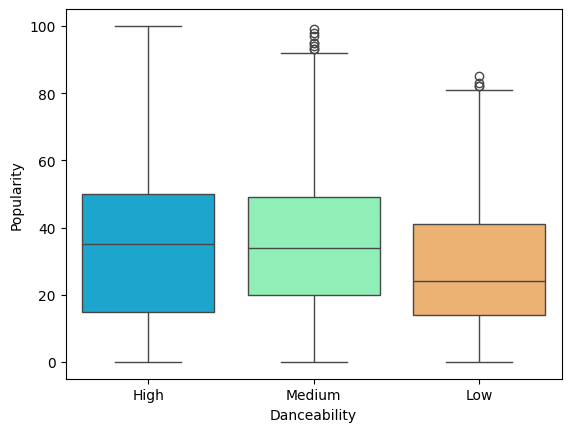

In [17]:
def check_danceability(value):
  if value > 0.7:
    return 'High'
  elif value > 0.3:
    return 'Medium'
  else:
    return 'Low'

df['danceability_class'] = df['danceability'].apply(check_danceability)
sns.boxplot(x=df['danceability_class'], y=df['popularity'], hue=df['danceability_class'], palette='rainbow').set(xlabel='Danceability', ylabel='Popularity')

In [18]:
#correlações
'''df_numbers = df[['popularity','duration_ms','danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature' ]].copy()
df_numbers.corr()'''
df.corr(numeric_only=True)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.023118,0.054820,0.064315,0.013613,0.003474,0.071687,-0.016360,-0.047197,-0.038839,-0.127635,-0.013955,-0.011564,0.007317,0.036875
duration_ms,-0.023118,1.000000,-0.065365,-0.064130,0.063261,0.011286,0.000364,-0.039347,-0.060744,-0.108499,0.117381,0.008126,-0.147037,0.025991,0.022602
explicit,0.054820,-0.065365,1.000000,0.119116,0.100696,0.006632,0.109049,-0.033848,0.328201,-0.091511,-0.112075,0.041332,-0.002713,-0.004072,0.037127
danceability,0.064315,-0.064130,0.119116,1.000000,0.143914,0.035114,0.271839,-0.062633,0.109520,-0.177043,-0.194747,-0.132234,0.492571,-0.021331,0.210041
energy,0.013613,0.063261,0.100696,0.143914,1.000000,0.046334,0.758774,-0.075014,0.141332,-0.732566,-0.181037,0.188941,0.256313,0.258628,0.186534
key,0.003474,0.011286,0.006632,0.035114,0.046334,1.000000,0.035902,-0.142096,0.017759,-0.045159,-0.005284,-0.002584,0.026258,0.008275,0.014801
loudness,0.071687,0.000364,0.109049,0.271839,0.758774,0.035902,1.000000,-0.037108,0.055295,-0.582663,-0.434717,0.077239,0.289091,0.228659,0.193695
mode,-0.016360,-0.039347,-0.033848,-0.062633,-0.075014,-0.142096,-0.037108,1.000000,-0.040798,0.091020,-0.052580,0.016777,0.025568,-0.001903,-0.023903
speechiness,-0.047197,-0.060744,0.328201,0.109520,0.141332,0.017759,0.055295,-0.040798,1.000000,0.005121,-0.099658,0.225102,0.032932,0.004032,-0.006198
acousticness,-0.038839,-0.108499,-0.091511,-0.177043,-0.732566,-0.045159,-0.582663,0.091020,0.005121,1.000000,0.096065,-0.019081,-0.103767,-0.220244,-0.174054


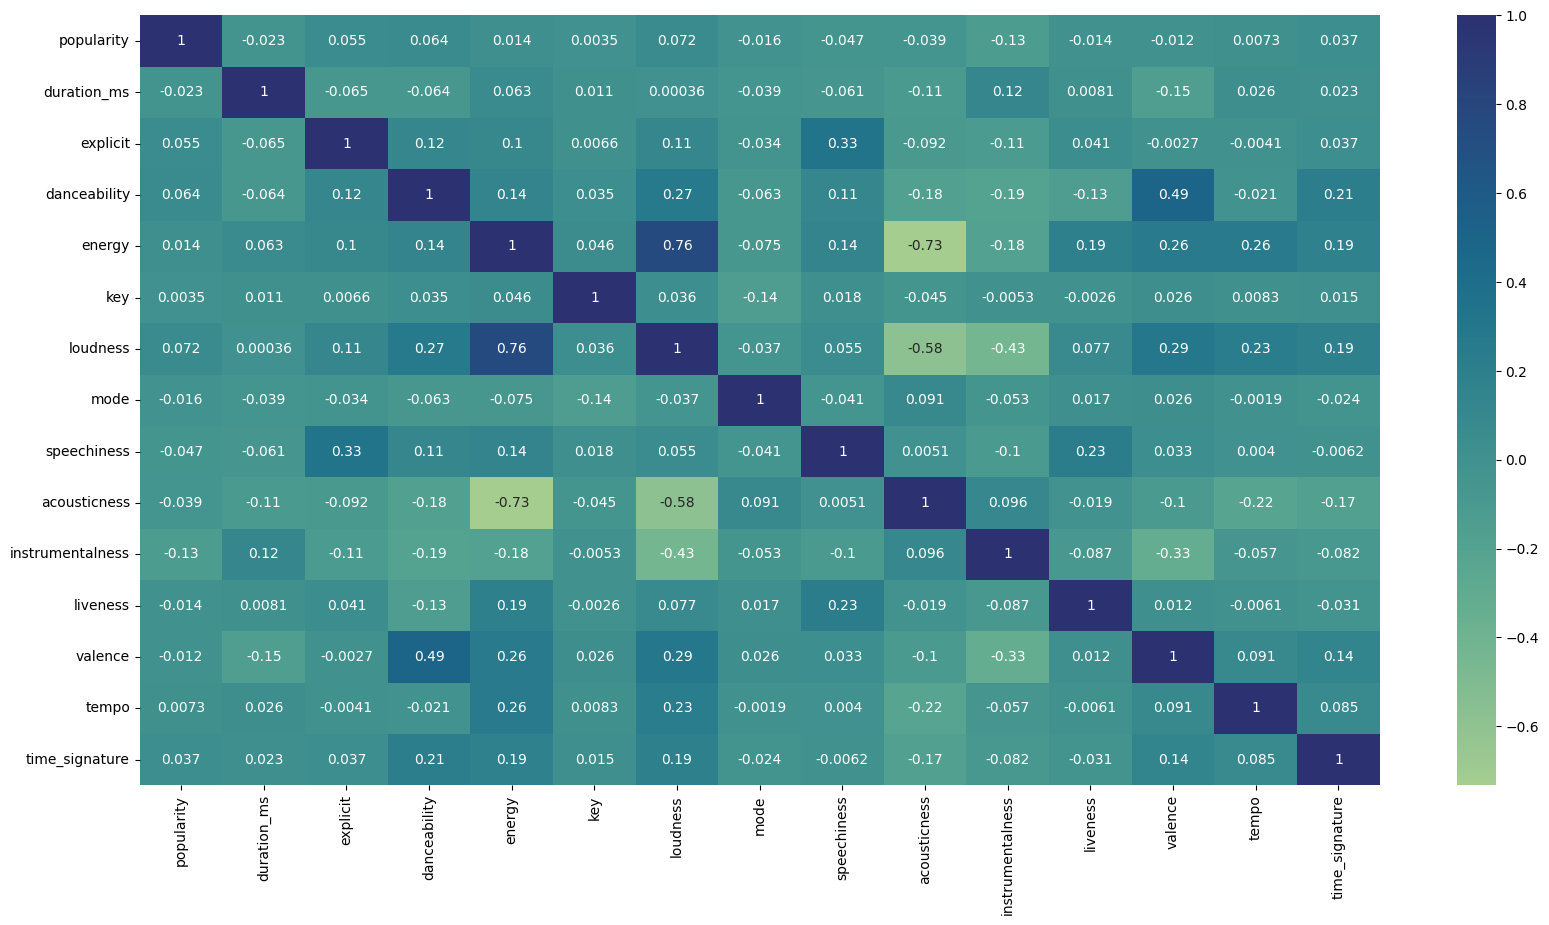

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest")
plt.rcParams['figure.figsize'] = (20,10)

In [21]:
#most popular artists
most_popular_artists = (df.groupby(['artists'])
    .agg({'track_id':'count'})
    .sort_values(by='track_id', ascending=False)
    .reset_index()
    .rename(columns={'artists':'Artista',
                     'track_id':'Número de músicas'}))
most_popular_artists.index = range(1, len(most_popular_artists)+1)
most_popular_artists

,Artista,Número de músicas
1,George Jones,260
2,my little airport,171
3,The Beatles,149
4,BTS,143
5,Håkan Hellström,141
...,...,...
31434,陳盈潔,1
31435,陳盈潔;袁小迪,1
31436,13th Floor Elevators,1
31437,163,1


In [22]:
#most popular genres
most_popular_genres = (df.groupby(['track_genre']).agg({'track_id':'count'}).sort_values(by='track_id', ascending=False).reset_index().rename(columns={'track_genre':'Gênero', 'track_id':'Número de músicas'}))
most_popular_genres.index = range(1, len(most_popular_genres)+1)
most_popular_genres['Gênero'] = most_popular_genres['Gênero'].apply(lambda x : x.capitalize())
most_popular_genres

,Gênero,Número de músicas
1,Tango,1000
2,Sleep,998
3,Study,998
4,Idm,994
5,Comedy,994
...,...,...
110,House,353
111,Reggae,329
112,Alternative,324
113,Songwriter,309


<Axes: >

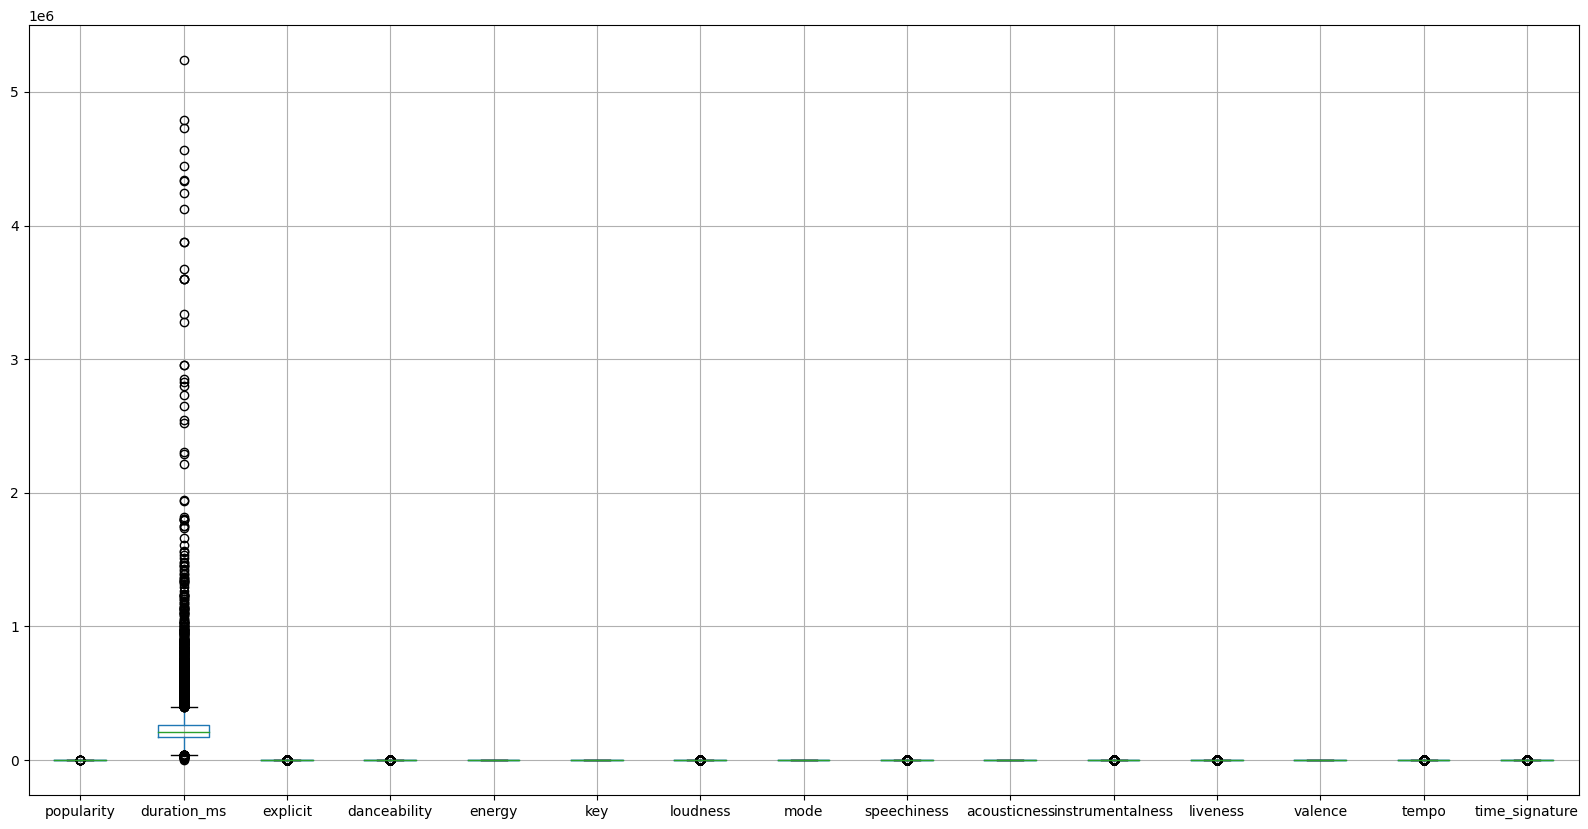

In [23]:
#finding outliers
df.boxplot()

<Axes: >

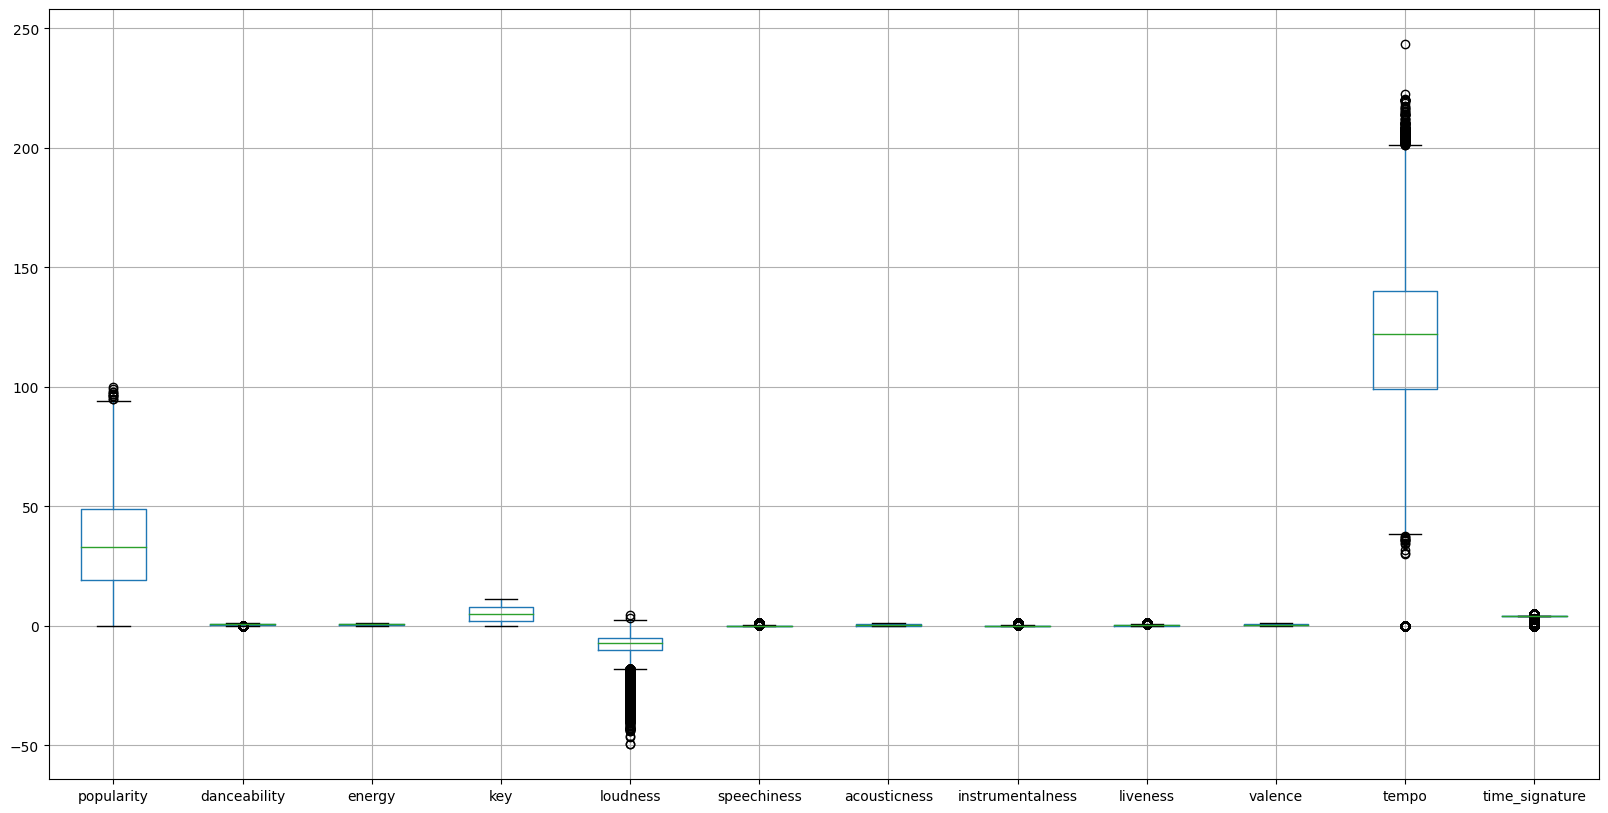

In [24]:
df2 = df.drop(['duration_ms', 'explicit', 'mode'], axis=1)
df2.boxplot(figsize=(20, 10))

In [25]:
df.to_csv('/content/dataset_ajustado.csv')

<Axes: >

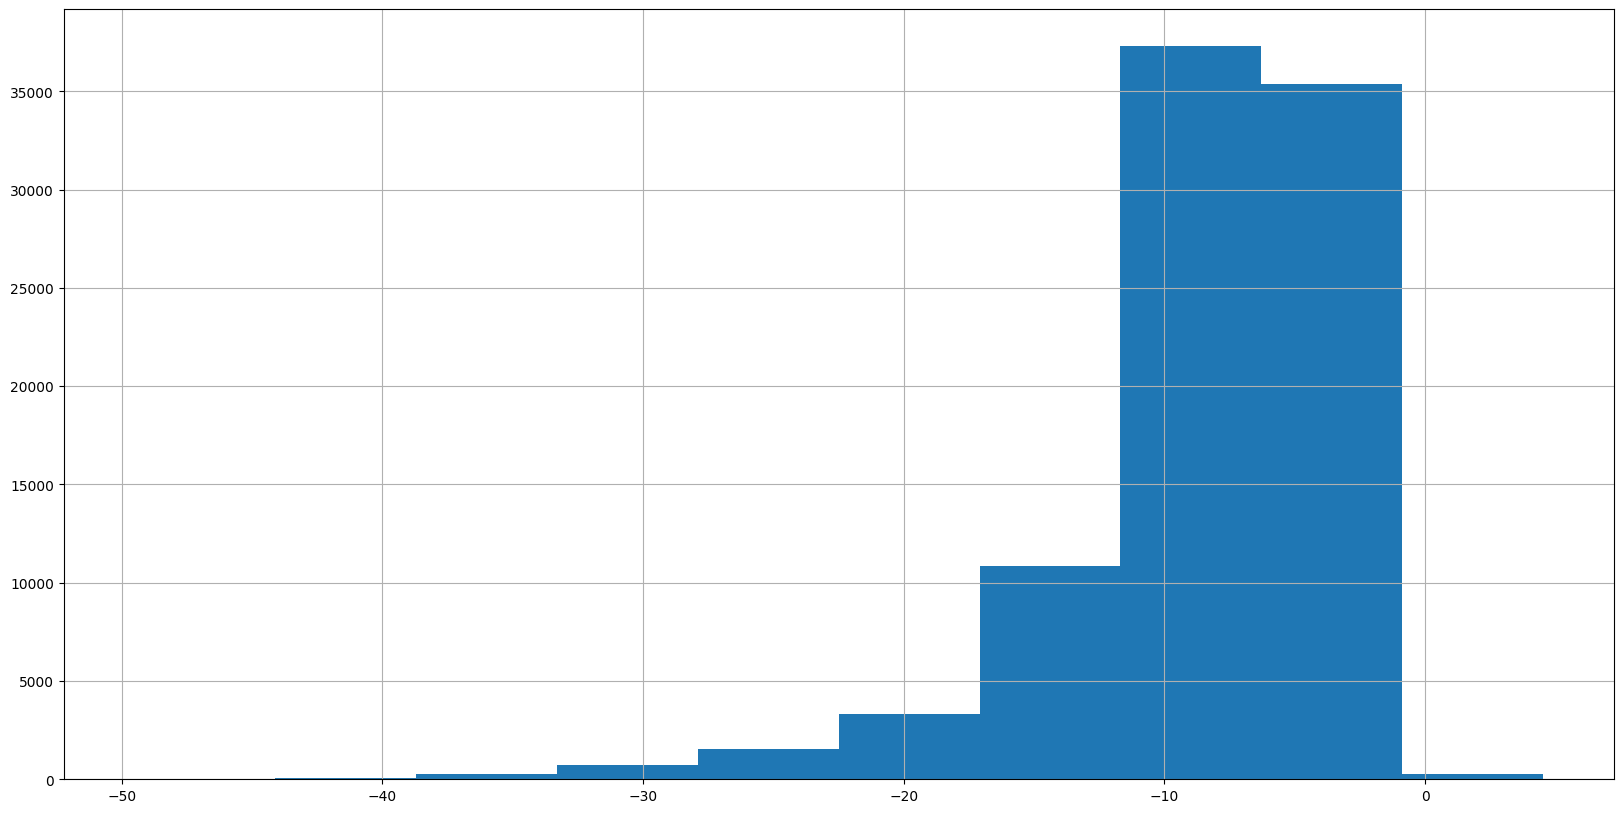

In [26]:
#verificar normalidade para variáveis envolvidas em correlações mais fortes
df['loudness'].hist()

<Axes: >

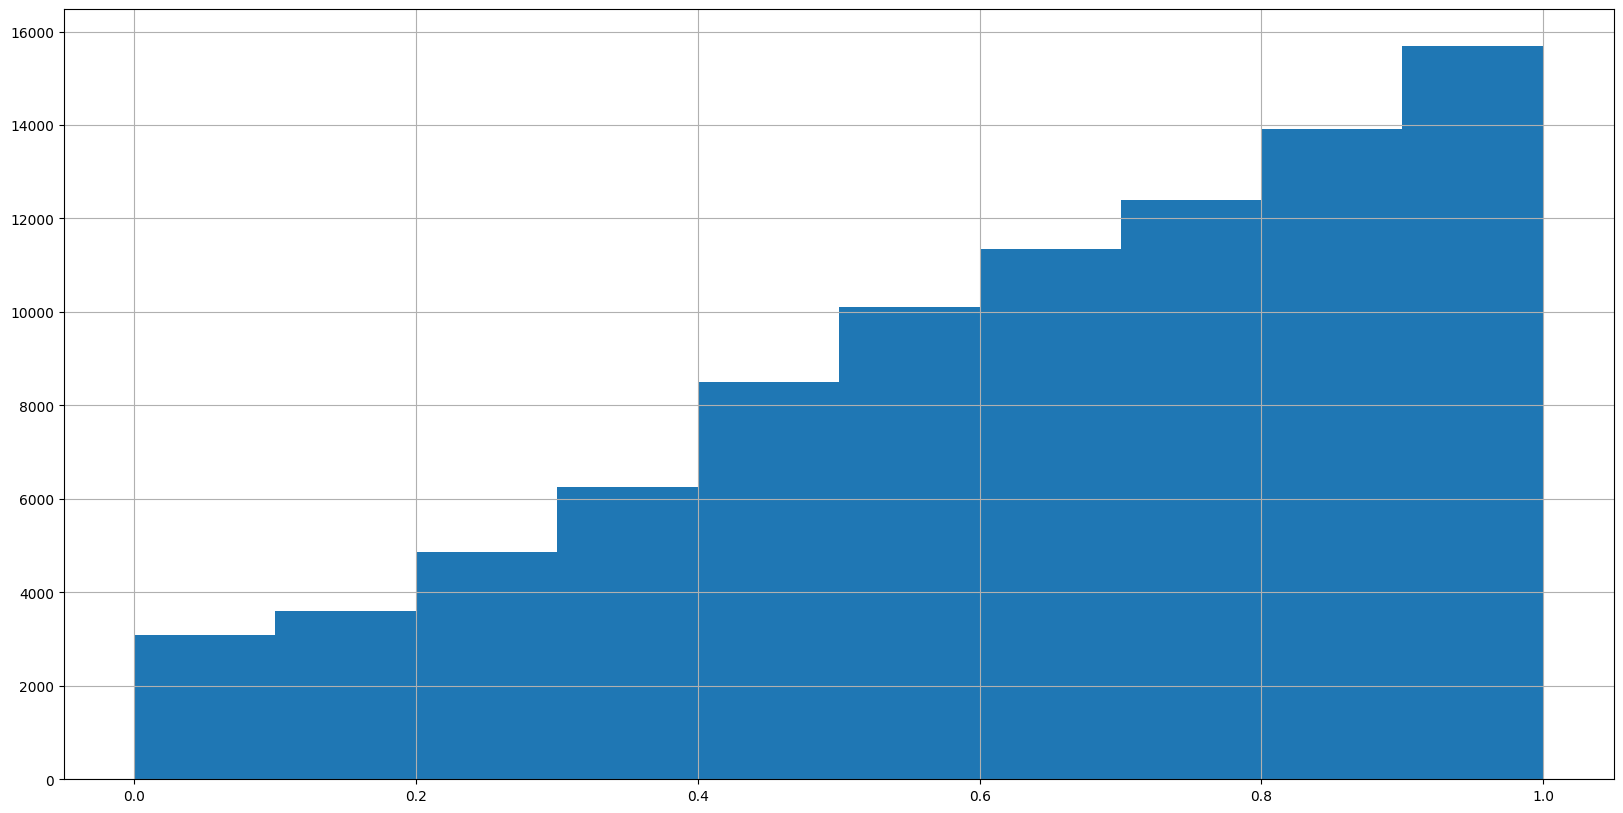

In [27]:
df['energy'].hist()

<Axes: >

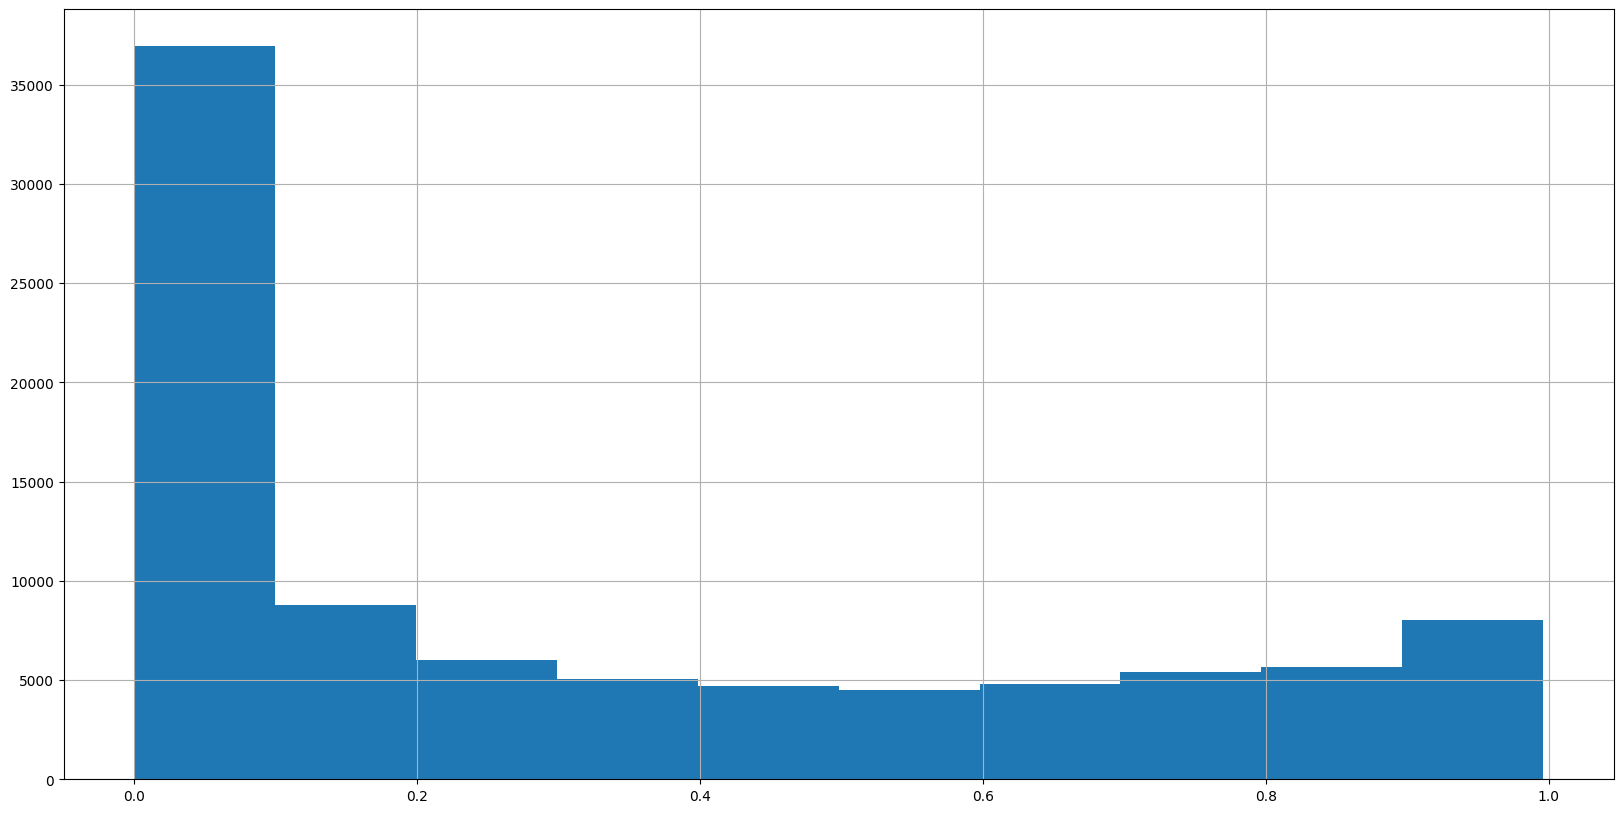

In [28]:
df['acousticness'].hist()

In [29]:
#verificar assimetria (quanto mais distante de zero, mais não normal)
stats.skew(df['loudness'])

-1.9598503531400817

In [30]:
stats.skew(df['energy'])

-0.5599793080080617

In [31]:
stats.skew(df['acousticness'])

0.6557297448212284

Verificar q-q plot em vez de realizar teste de normalidade. Para grandes amostras, testes de normalidade podem superestimar pequenos desvios da normalidade. Para pequenas amostras, podem subestimar grandes desvios.
Fonte: https://towardsdatascience.com/stop-testing-for-normality-dba96bb73f90

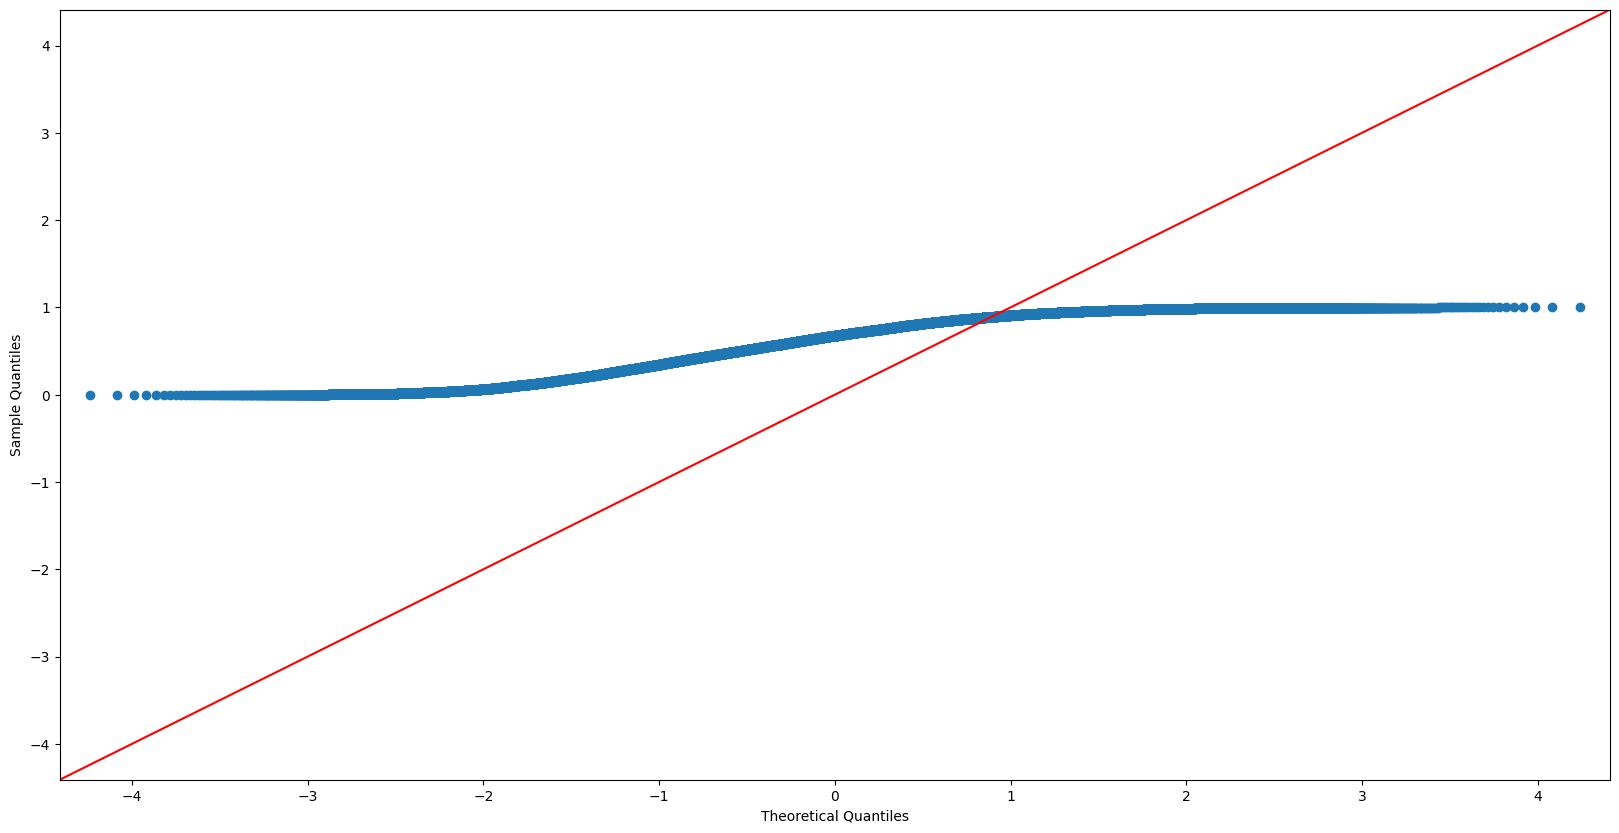

In [32]:
#q-q plot (usar plt.show() para mostrar cada gráfico apenas uma vez)
sm.qqplot(df['energy'], line='45')
plt.show()

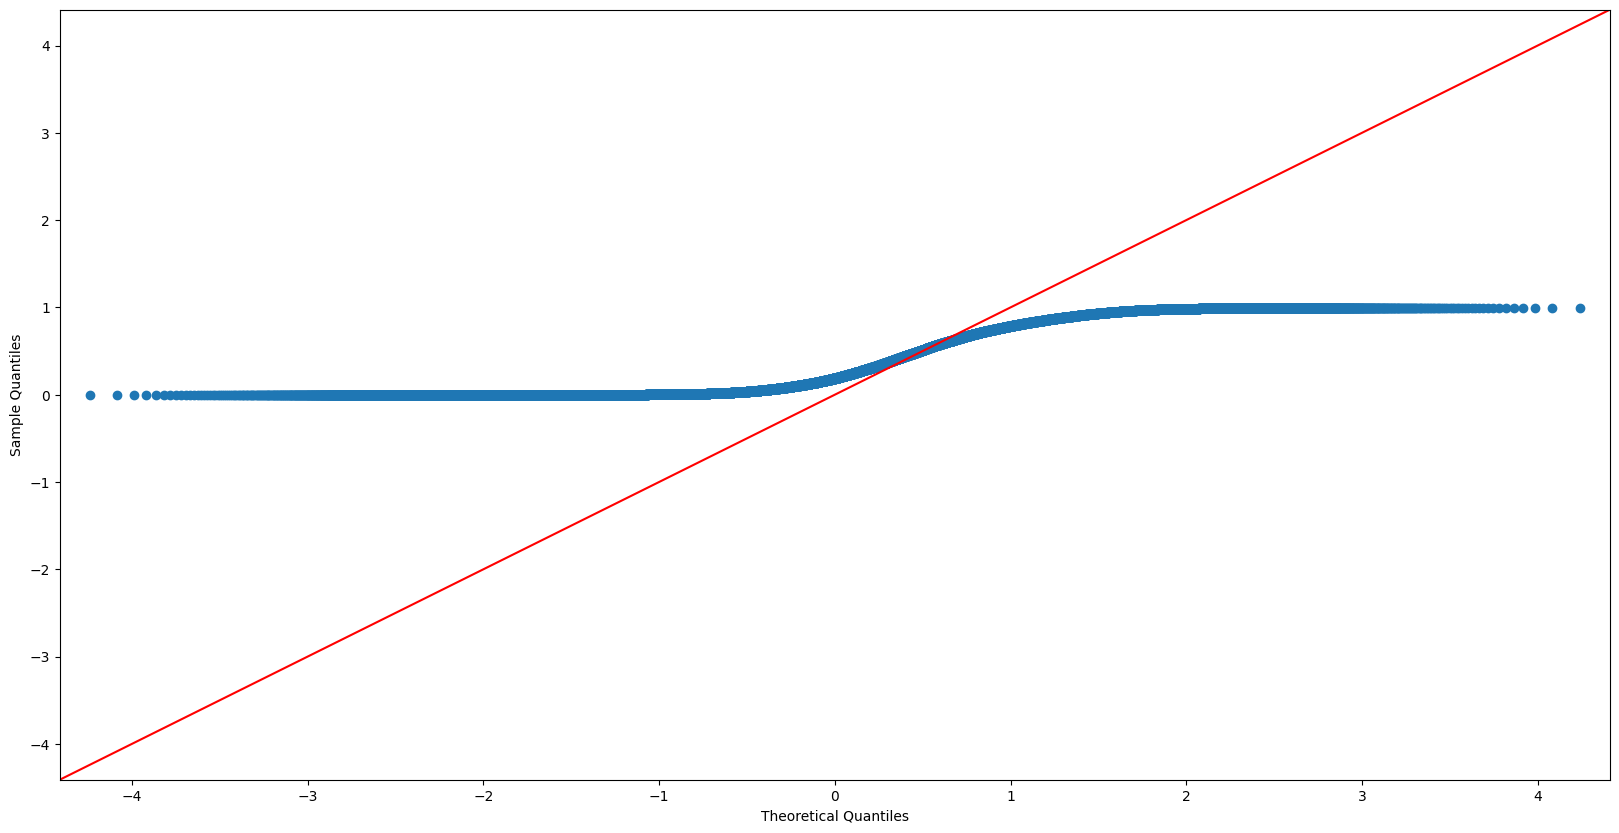

In [33]:
sm.qqplot(df['acousticness'], line='45')
plt.show()

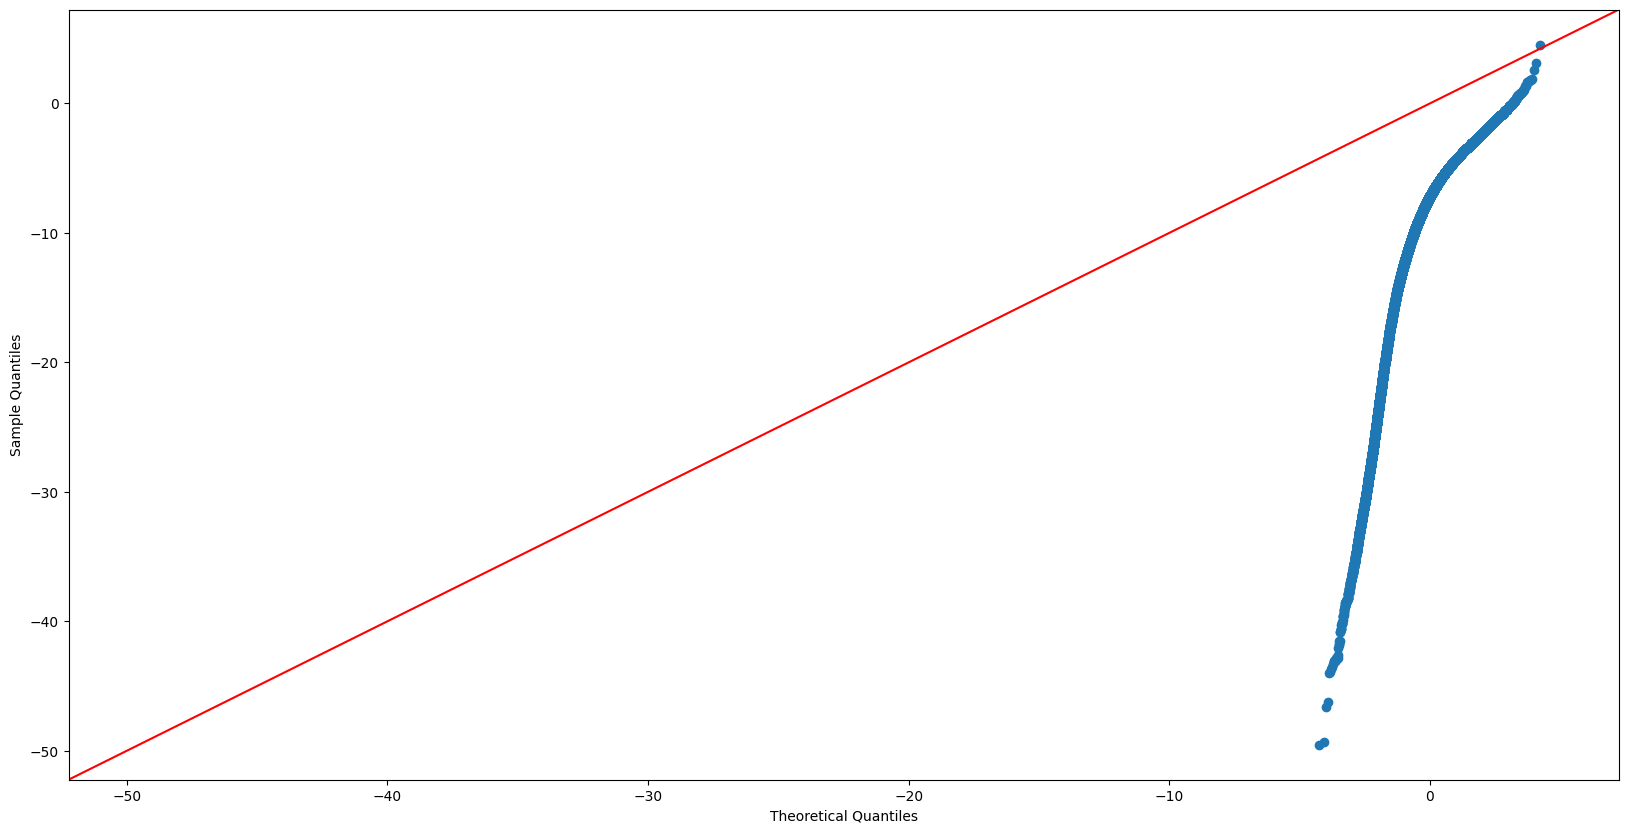

In [34]:
sm.qqplot(df['loudness'], line='45')
plt.show()

In [35]:
df['energy_class'] = df['energy'].apply(lambda x : 'Low' if x <= 0.576 else 'High')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_class,energy_class
0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop,High,Low
1,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,...,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop,Medium,High
2,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,...,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggae,High,High
3,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,...,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm,Medium,High
4,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,5,...,0.2530,0.09930,0.000291,0.1260,0.187,106.672,4,latin,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89736,19rR5bpBnKE8jQvJOTvPla,A R I Z O N A,Mellow Electronic Pop,Nostalgic,0,182667,False,0.691,0.539,0,...,0.1050,0.24600,0.155000,0.1780,0.328,99.974,4,indie-pop,Medium,Low
89737,4DTGLPQPkto00HaMxlGLZm,MisterWives,All Out Alternative,3 small words,0,193026,False,0.646,0.593,11,...,0.0298,0.02900,0.000000,0.0343,0.880,98.949,4,indie-pop,Medium,High
89738,6fRSzXf5gWRuoKCnsYgWy5,MisterWives,Here to Forever - All New Indie,3 small words,0,193026,False,0.646,0.593,11,...,0.0298,0.02900,0.000000,0.0343,0.880,98.949,4,indie-pop,Medium,High
89739,7qS6cgQmdUDSy8Y7ZtfjYZ,Bella Poarch,New Pop Icons,Build a Bitch,0,122772,True,0.855,0.463,3,...,0.0367,0.21700,0.000018,0.3470,0.866,102.931,4,alternative,High,Low


In [36]:
novo_df = df[['energy_class', 'acousticness']].copy()
novo_df.head(5)

,energy_class,acousticness
0,Low,0.01300
1,High,0.01250
2,High,0.58300
3,High,0.00383
4,High,0.09930


In [37]:
#separar grupos
group1 = novo_df['energy_class'] == 'High'
group2 = novo_df['energy_class'] == 'Low'
group1_acoust = novo_df['acousticness'][group1]
group2_acoust = novo_df['acousticness'][group2]

In [38]:
U, p = stats.mannwhitneyu(group1_acoust, group2_acoust)
print(f'U = {U}, p = {p}')

U = 263700224.5, p = 0.0


Há diferença estatisticamente significante na acusticidade entre músicas de alta e baixa energia. Resultado esperado já que a análise de correlação mostrou que há uma forte correlação negativa (-0,73) entre as variáveis acousticness e energy.

[Text(0.5, 0, 'Energy level'), Text(0, 0.5, 'Acousticness')]

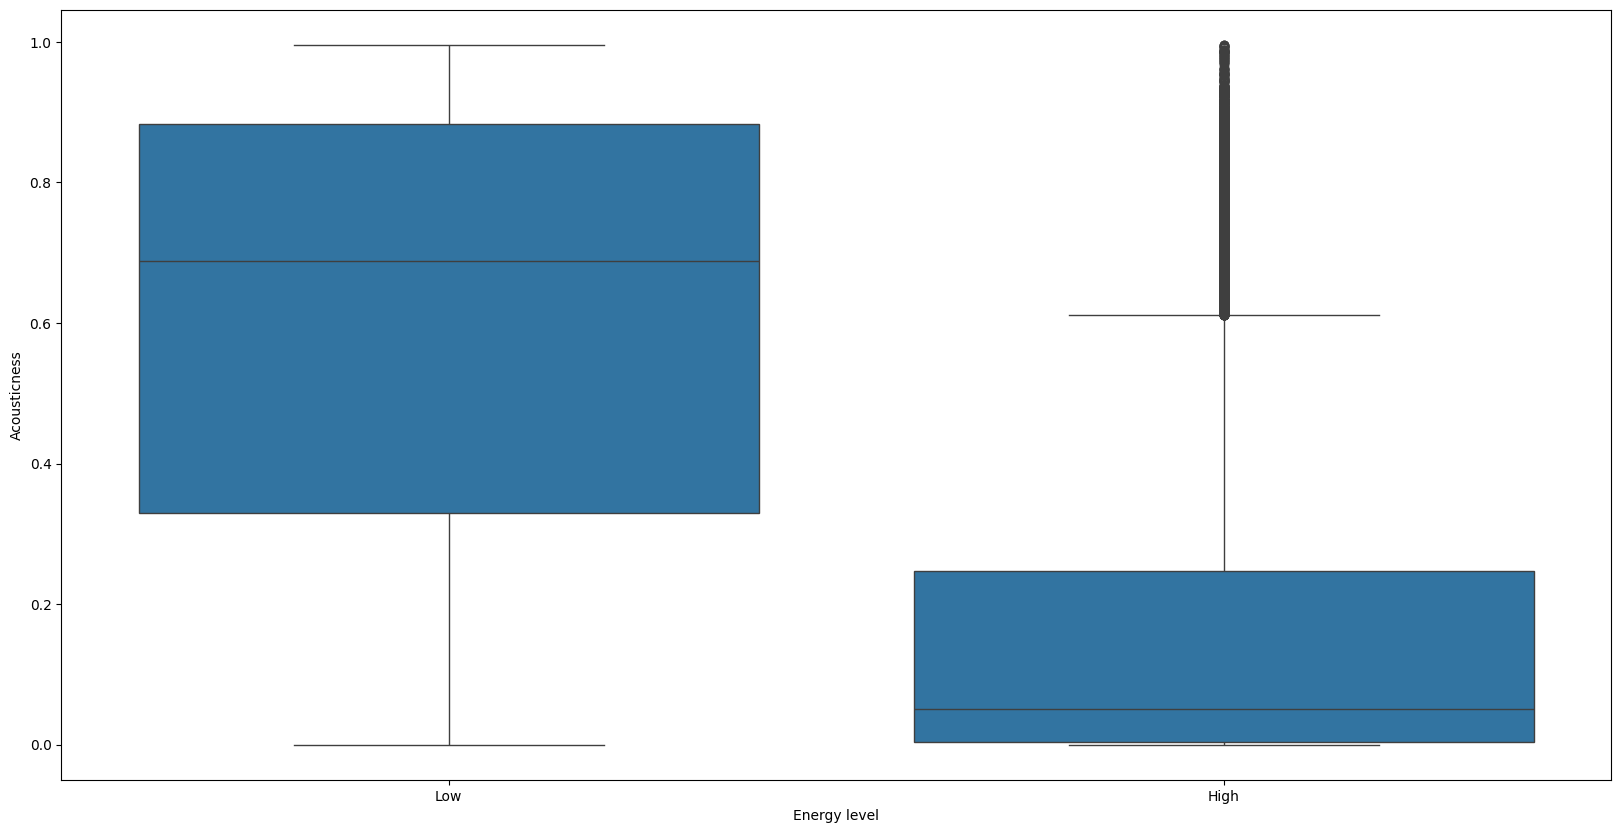

In [39]:
sns.boxplot(x=novo_df['energy_class'], y=novo_df['acousticness']).set(xlabel='Energy level', ylabel='Acousticness')